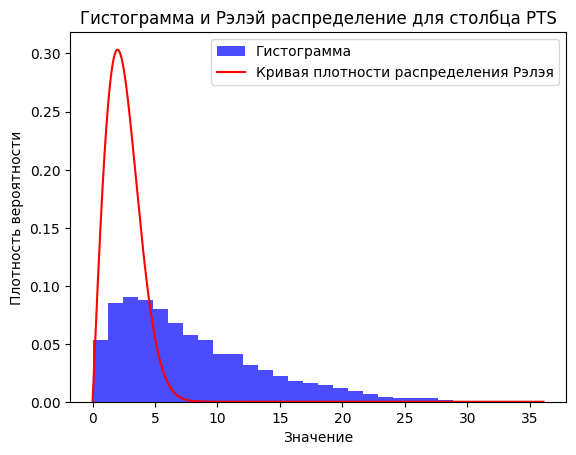

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh

# Загрузка датасета NBA_Player_Stats.csv
file_path = 'NBA_Player_Stats.csv'
df = pd.read_csv(file_path)

# Выбираем столбец для построения гистограммы
column_name = 'PTS'  # Здесь 'PTS' - это пример, вы можете выбрать другой столбец

# Построение гистограммы
plt.hist(df[column_name], bins=30, density=True, alpha=0.7, color='b', label='Гистограмма')

# Генерация выборки с распределением Рэлэя
sample_size = 1000
scale_parameter = 2  # Пример параметра масштаба для распределения Рэлэя

data = rayleigh.rvs(scale=scale_parameter, size=sample_size)

# Генерация значений для кривой плотности распределения
x = np.linspace(0, df[column_name].max(), 1000)
pdf = rayleigh.pdf(x, scale=scale_parameter)

# Построение кривой плотности распределения Рэлэя
plt.plot(x, pdf, 'r', label='Кривая плотности распределения Рэлэя')

plt.title(f'Гистограмма и Рэлэй распределение для столбца {column_name}')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


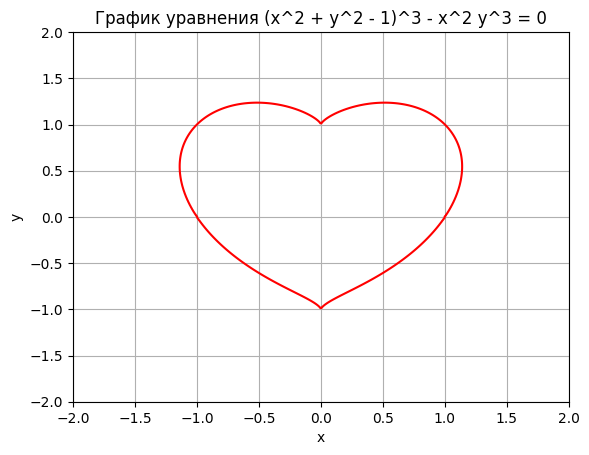

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Уравнение
equation = (x**2 + y**2 - 1)**3 - x**2 * y**3

# Построение графика
plt.contour(x, y, equation, levels=[0], colors='r')
plt.title('График уравнения (x^2 + y^2 - 1)^3 - x^2 y^3 = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


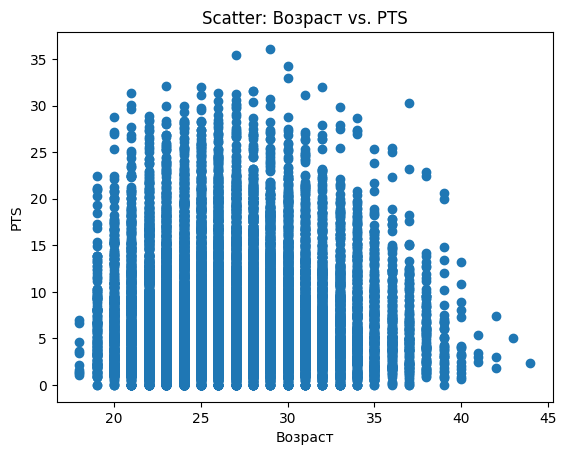

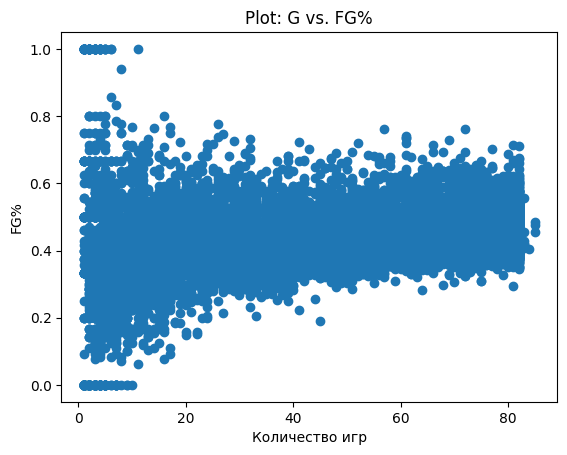

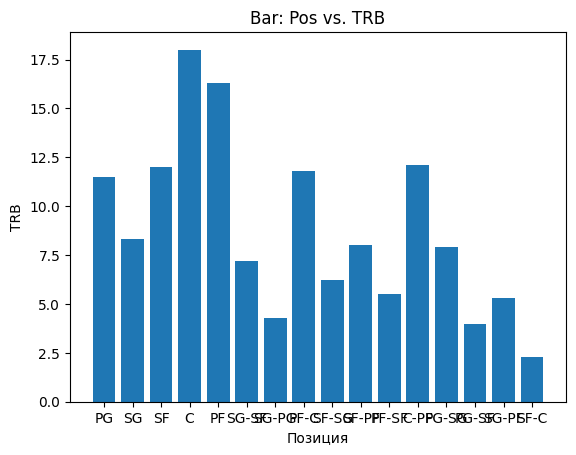

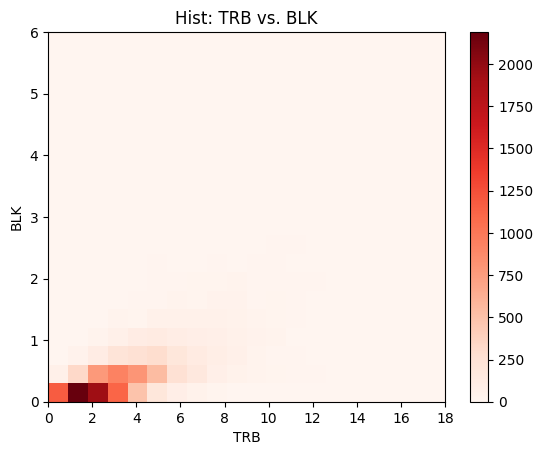

Корреляция между PTS и AST: 0.6620165253926584


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Примеры зависимостей:
# 1. Возраст vs. Количество очков (PTS)
plt.scatter(df['Age'], df['PTS'])
plt.title('Scatter: Возраст vs. PTS')
plt.xlabel('Возраст')
plt.ylabel('PTS')
plt.show()

# 2. Количество игр (G) vs. Средний процент успешных бросков (FG%)
plt.plot(df['G'], df['FG%'], marker='o', linestyle='None')
plt.title('Plot: G vs. FG%')
plt.xlabel('Количество игр')
plt.ylabel('FG%')
plt.show()

# 3. Позиция (Pos) vs. Общее количество подборов (TRB)
plt.bar(df['Pos'], df['TRB'])
plt.title('Bar: Pos vs. TRB')
plt.xlabel('Позиция')
plt.ylabel('TRB')
plt.show()

# 4. Общее количество подборов (TRB) vs. Среднее количество блоков (BLK)
plt.hist2d(df['TRB'], df['BLK'], bins=(20, 20), cmap=plt.cm.Reds)
plt.title('Hist: TRB vs. BLK')
plt.xlabel('TRB')
plt.ylabel('BLK')
plt.colorbar()
plt.show()

# Корреляция между двумя столбцами (например, PTS и AST)
correlation, _ = pearsonr(df['PTS'], df['AST'])
print(f'Корреляция между PTS и AST: {correlation}')


In [18]:
import pandas as pd
import numpy as np

# Загрузка данных из CSV файла
df = pd.read_csv('ds_salaries.csv')

# Преобразование уровня опыта в числовой формат
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level'] = df['experience_level'].map(experience_mapping)

# 1. Группировка вакансий по направлениям
grouped_by_direction = df.groupby('job_title')

# 2. Средняя и медианная зарплата по группам вакансий
average_salary_by_direction = grouped_by_direction['salary_in_usd'].mean()
median_salary_by_direction = grouped_by_direction['salary_in_usd'].median()

# 3. Средняя и медианная зарплата по каждому региону
average_salary_by_region = df.groupby('employee_residence')['salary_in_usd'].mean()
median_salary_by_region = df.groupby('employee_residence')['salary_in_usd'].median()

# 4. Самая высокооплачиваемая из групп вакансий
highest_paid_direction = average_salary_by_direction.idxmax()

# 5. Процентное соотношение каждого региона по вакансиям от всех вакансий
region_percentage = df['employee_residence'].value_counts(normalize=True)

# 6. Корреляция уровня опыта от зарплаты
correlation_experience_salary = df['experience_level'].corr(df['salary_in_usd'])

# 7. Количество должностей в наборе данных
num_positions = len(df['job_title'].unique())

# 8. 10 наиболее часто встречающихся должностей
top_10_positions = df['job_title'].value_counts().head(10)

# Вывод результатов
print("\n1. Группировка вакансий по направлениям:")
print(grouped_by_direction.groups)
print("\n2. Средняя зарплата по направлениям:")
print(average_salary_by_direction)
print("\n3. Медианная зарплата по направлениям:")
print(median_salary_by_direction)
print("\n4. Средняя зарплата по регионам:")
print(average_salary_by_region)
print("\n5. Медианная зарплата по регионам:")
print(median_salary_by_region)
print("\n6. Самая высокооплачиваемая группа вакансий:")
print(highest_paid_direction)
print("\n7. Процентное соотношение регионов по вакансиям:")
print(region_percentage)
print("\n8. Корреляция уровня опыта от зарплаты:")
print(correlation_experience_salary)
print("\n9. Количество должностей в наборе данных:")
print(num_positions)
print("\n10. 10 наиболее часто встречающихся должностей:")
print(top_10_positions)



1. Группировка вакансий по направлениям:
{'3D Computer Vision Researcher': [77], 'AI Scientist': [52, 96, 113, 244, 277, 391, 606], 'Analytics Engineer': [344, 368, 560, 561], 'Applied Data Scientist': [82, 123, 509, 519, 525], 'Applied Machine Learning Scientist': [132, 157, 489, 506], 'BI Data Analyst': [23, 73, 76, 102, 168, 196], 'Big Data Architect': [255], 'Big Data Engineer': [2, 17, 31, 120, 180, 192, 213, 230], 'Business Data Analyst': [8, 28, 279, 458, 511], 'Cloud Data Engineer': [95, 149], 'Computer Vision Engineer': [54, 133, 216, 271, 454, 521], 'Computer Vision Software Engineer': [98, 99, 510], 'Data Analyst': [5, 14, 15, 34, 38, 50, 51, 79, 86, 89, 100, 103, 105, 118, 122, 124, 135, 140, 172, 229, 233, 241, 254, 261, 290, 291, 296, 297, 305, 306, 307, 308, 318, 325, 326, 327, 328, 329, 330, 331, 332, 333, 336, 338, 339, 349, 360, 361, 362, 363, 367, 376, 382, 383, 387, 392, 393, 402, 403, 406, 408, 429, 430, 431, 440, 441, 470, 471, 522, 527, 528, 529, 530, 531, 536, 

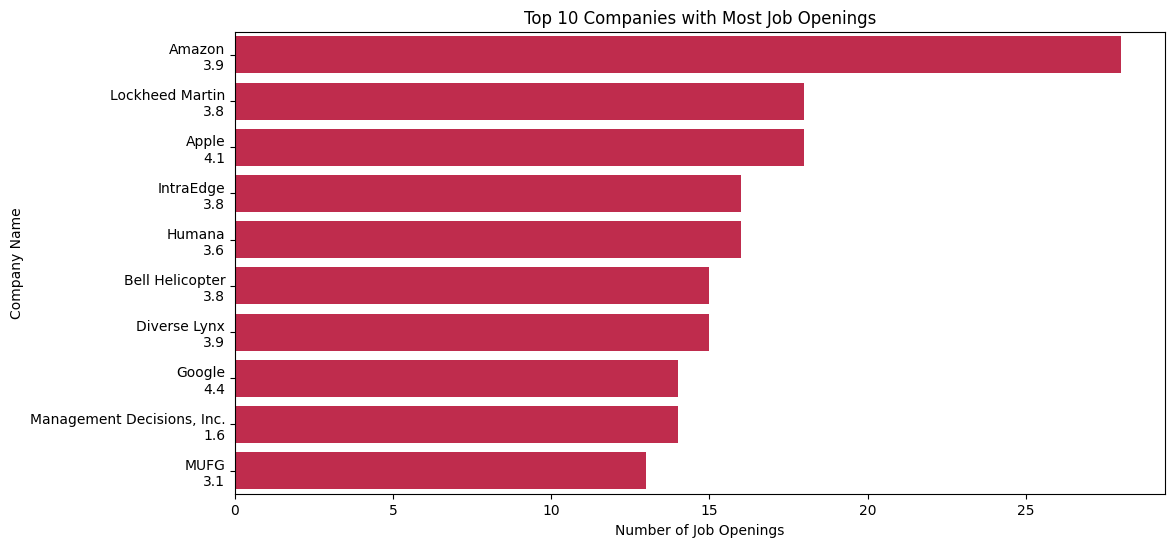

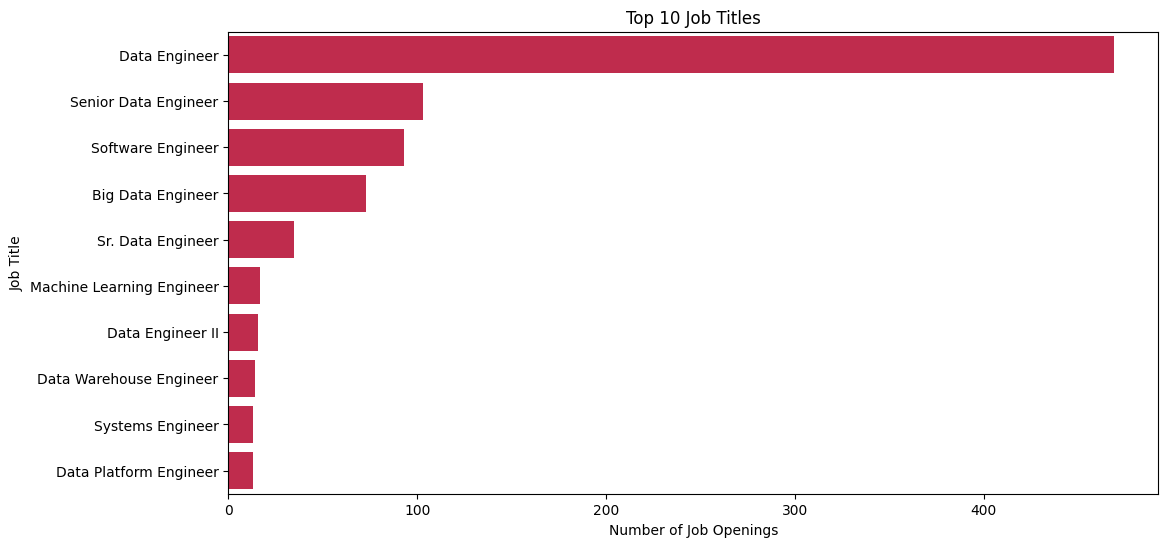

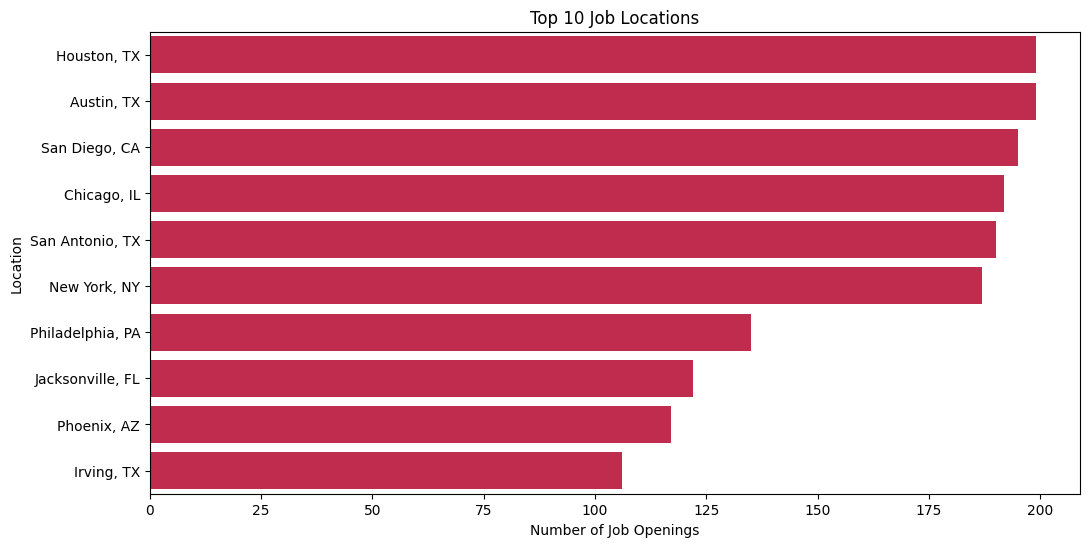

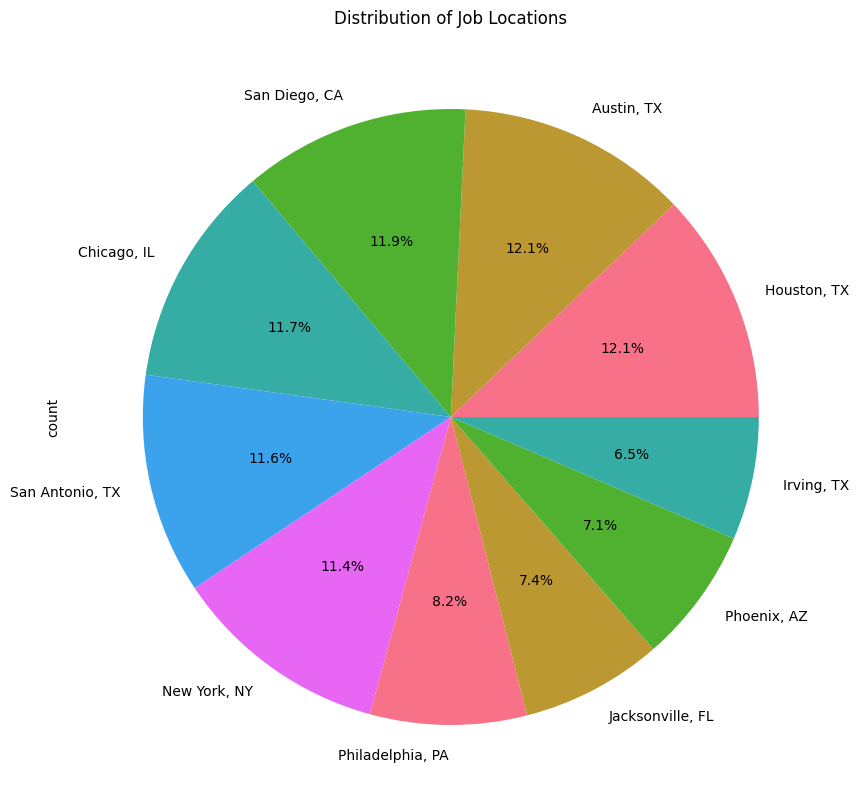

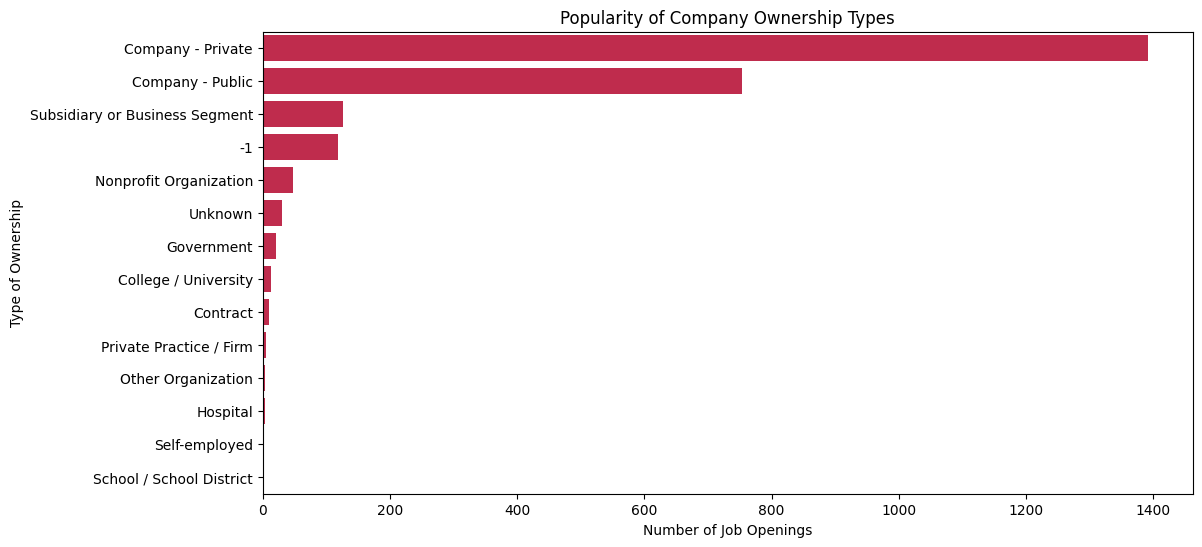

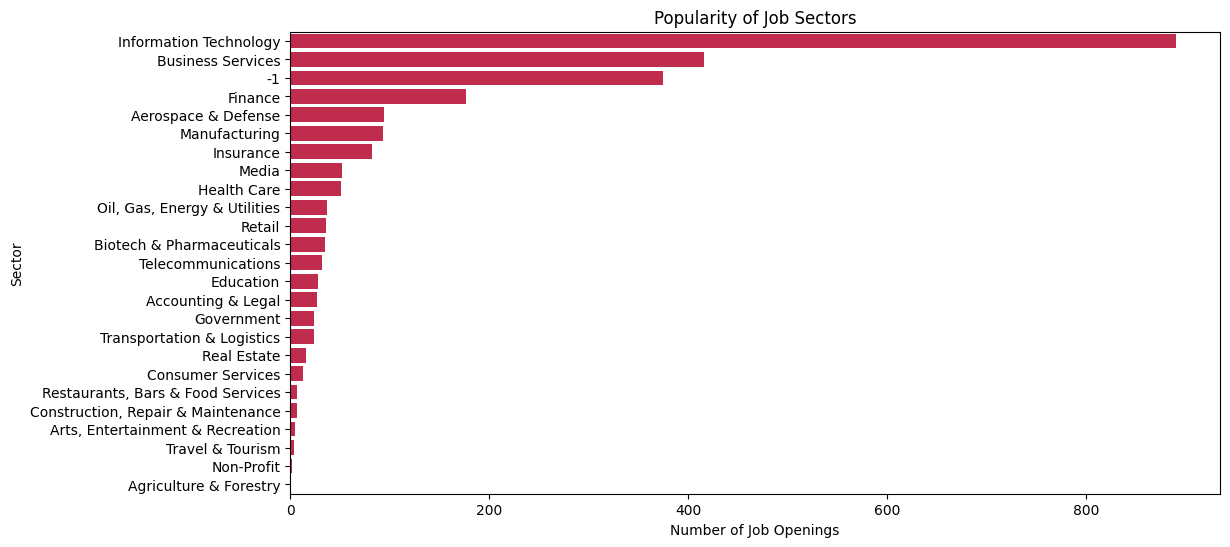

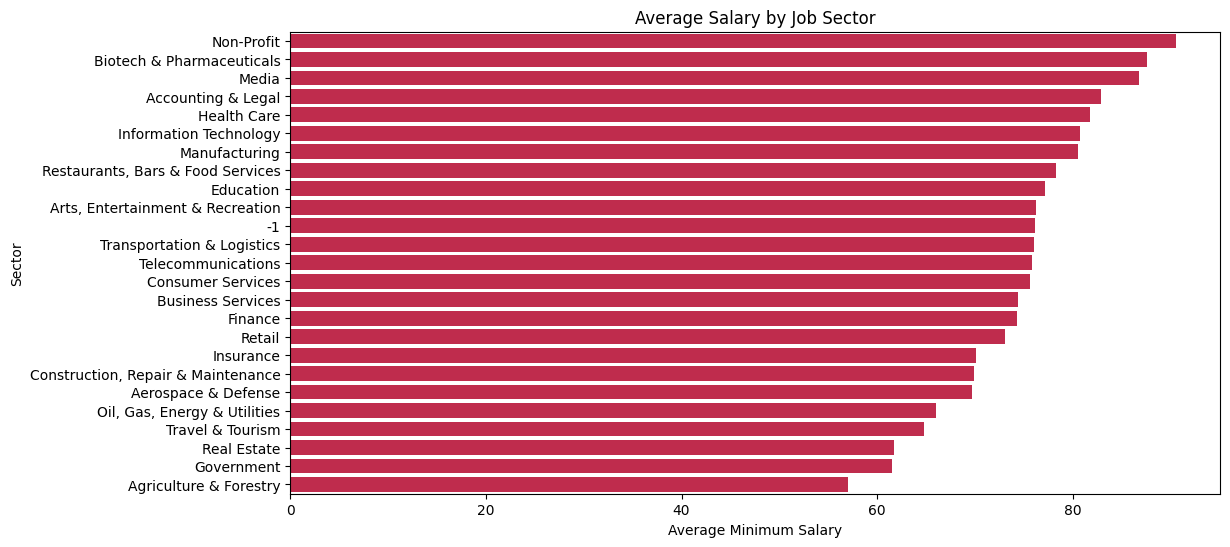

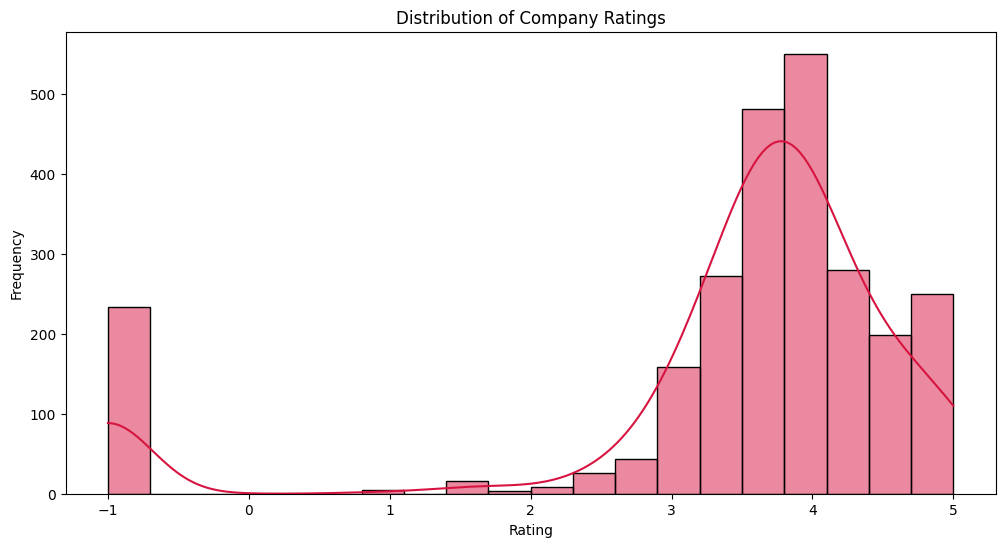

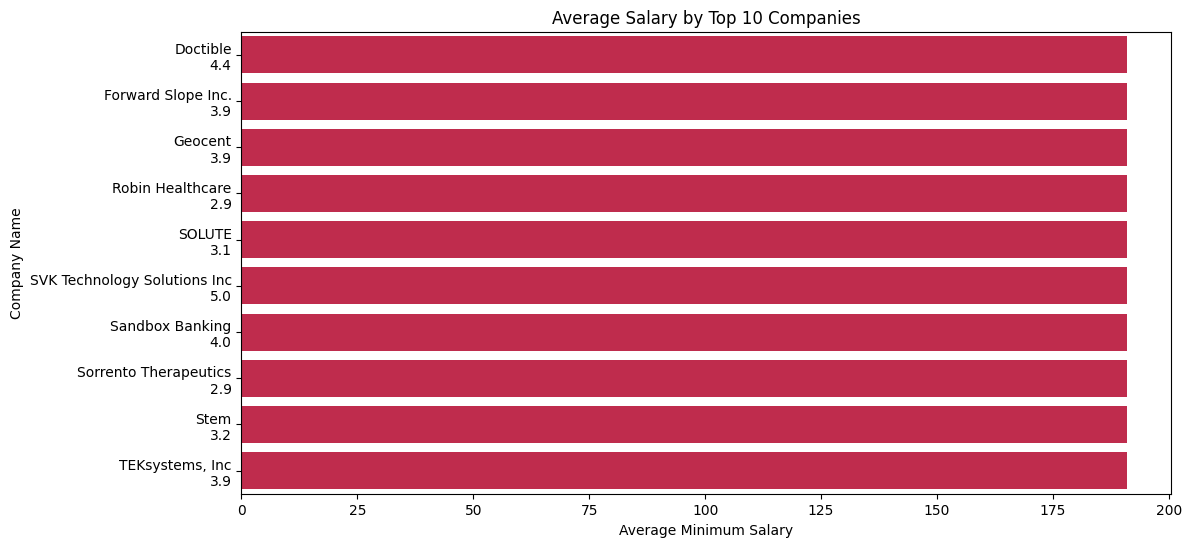

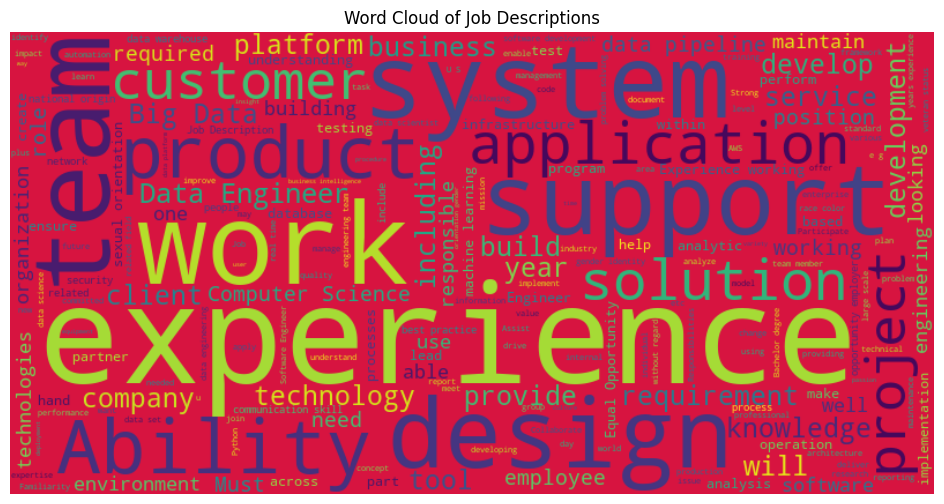

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Загрузка данных из CSV файла
df = pd.read_csv('DataEngineer.csv')

# Определение основных цветов HH.ru
hh_red = '#d71440'
hh_white = '#ffffff'

# Очистка столбца Salary Estimate от текста
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'\(Glassdoor est.\)', '', x))

# Используем другой метод для извлечения числовых значений из столбца с зарплатой
salary_pattern = r'\$(\d+)[Kk]?\s*-\s*\$(\d+)[Kk]?'
salary_values = df['Salary Estimate'].str.extract(salary_pattern)

# Преобразование в числовой формат и добавление новых столбцов
df['Min Salary'] = pd.to_numeric(salary_values[0], errors='coerce')
df['Max Salary'] = pd.to_numeric(salary_values[1], errors='coerce')

# Построение графика компаний с самым большим количеством вакансий
plt.figure(figsize=(12, 6))
top_companies = df['Company Name'].value_counts().nlargest(10)
sns.barplot(x=top_companies.values, y=top_companies.index, color=hh_red)
plt.title('Top 10 Companies with Most Job Openings')
plt.xlabel('Number of Job Openings')
plt.ylabel('Company Name')
plt.show()

# Построение графика самых популярных названий в вакансиях
plt.figure(figsize=(12, 6))
top_titles = df['Job Title'].value_counts().nlargest(10)
sns.barplot(x=top_titles.values, y=top_titles.index, color=hh_red)
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Job Openings')
plt.ylabel('Job Title')
plt.show()

# Построение графика популярности местоположений вакансий
plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, color=hh_red)
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Job Openings')
plt.ylabel('Location')
plt.show()

# Построение круговой диаграммы местоположений вакансий с разными цветами
plt.figure(figsize=(10, 10))
df['Location'].value_counts().nlargest(10).plot.pie(autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Distribution of Job Locations')
plt.show()

# Построение графика популярности по колонке Type of ownership
plt.figure(figsize=(12, 6))
ownership_counts = df['Type of ownership'].value_counts()
sns.barplot(x=ownership_counts.values, y=ownership_counts.index, color=hh_red)
plt.title('Popularity of Company Ownership Types')
plt.xlabel('Number of Job Openings')
plt.ylabel('Type of Ownership')
plt.show()

# Построение графика популярности по секторам работы
plt.figure(figsize=(12, 6))
sector_counts = df['Sector'].value_counts()
sns.barplot(x=sector_counts.values, y=sector_counts.index, color=hh_red)
plt.title('Popularity of Job Sectors')
plt.xlabel('Number of Job Openings')
plt.ylabel('Sector')
plt.show()

# Построение графика секторов работы и среднего уровня зарплат
plt.figure(figsize=(12, 6))
avg_salary_by_sector = df.groupby('Sector')['Min Salary'].mean().sort_values(ascending=False)
sns.barplot(x=avg_salary_by_sector.values, y=avg_salary_by_sector.index, color=hh_red)
plt.title('Average Salary by Job Sector')
plt.xlabel('Average Minimum Salary')
plt.ylabel('Sector')
plt.show()

# Построение гистограммы распределения рейтинга компаний
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'].dropna(), bins=20, color=hh_red, kde=True)
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Построение графика средних зарплат по популярным компаниям
plt.figure(figsize=(12, 6))
avg_salary_by_company = df.groupby('Company Name')['Min Salary'].mean().nlargest(10)
sns.barplot(x=avg_salary_by_company.values, y=avg_salary_by_company.index, color=hh_red)
plt.title('Average Salary by Top 10 Companies')
plt.xlabel('Average Minimum Salary')
plt.ylabel('Company Name')
plt.show()

# Построение облака тегов по описанию вакансий с измененными цветами
plt.figure(figsize=(12, 6))
text = ' '.join(df['Job Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color=hh_red, colormap='viridis').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()
